In [29]:
opts = []
with open('../data/resnet10_sgd_adam.txt', 'r') as f:
    lines = []
    for l in f.readlines():
        ls = l.split()
        if len(ls)==8:
            epoch = float(ls[1].rstrip(':'))
            acc = float(ls[4].rstrip('%,'))
            try:
                loss = float(ls[-1].rstrip('.'))
            except Exception as e:
                loss = float(ls[-2])
                
            lines.append([epoch, acc, loss])
            
        elif len(ls)>8:
            eer = float(ls[2].rstrip('%,'))
            min01 = float(ls[6].rstrip(','))
            min001 = float(ls[8].rstrip('.'))
            
            lines.append([eer, min01, min001])
        else:
            opts.append(lines)
            lines = []
    opts.append(lines)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
sgd_loss = np.array(opts[0])
sgd_eer = np.array(opts[2])
sgd = np.concatenate([sgd_loss, sgd_eer], axis=1)


adam_loss = np.array(opts[1])
adam_eer = np.array(opts[3])
adam = np.concatenate([adam_loss, adam_eer], axis=1)


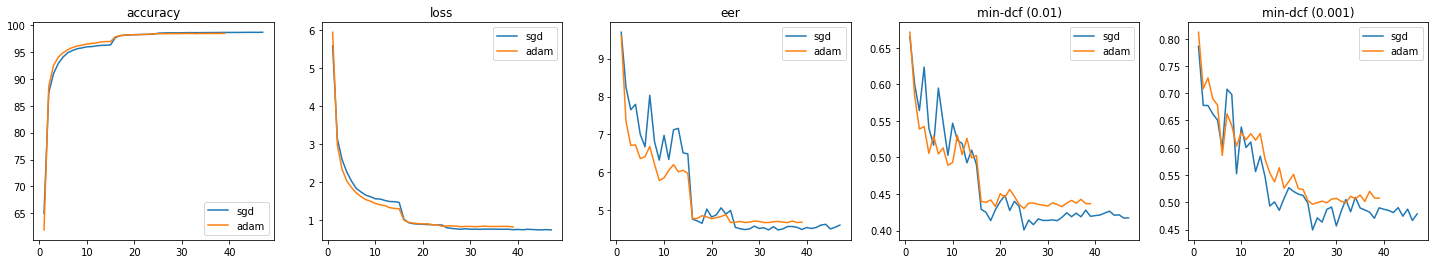

In [43]:
N = sgd.shape[-1]-1
names = ['accuracy', 'loss', 'eer', 'min-dcf (0.01)', 'min-dcf (0.001)']
plt.figure(figsize=(int(N*5), 4))


for i in range(N):
    ax = plt.subplot(1, N, i+1)
    plt.title(names[i])
    plt.plot(sgd[:,0], sgd[:, i+1])
    plt.plot(adam[:,0], adam[:,i+1])
    plt.legend(['sgd', 'adam'])
    
# 使用 rop scheduler 时, sgd 和 adam 没有明显的训练速度差异
# sgd 收敛更好

In [23]:
len('Train EER: 4.5334%, Threshold: 0.2437, mindcf-0.01: 0.4145, mindcf-0.001: 0.4829. '.split())

9

In [24]:
len('Test EER(%):         9.61    Threshold:  0.2729  MinDcf-0.01: 0.6715  MinDcf-0.001: 0.8118 .'.split())

10